In [2]:
import requests as r
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

In [3]:
resp.status_code

200

In [4]:
raw_data = resp.json()

In [5]:
raw_data[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [6]:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [16]:
final_data.insert(0, ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'])
final_data

[['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 ['confirmados', 'obitos', 'recuperados', 'ativos', 'data'],
 [1, 0, 0, 1, '2020-02-26'],
 [1, 0, 0, 1, '2020-02-27'],
 [1, 0, 0, 1, '2020-02-28'],
 [2, 0, 0, 2, '2020-02-29'],
 [2, 0, 0, 2, '2020-03-01'],
 [2, 0, 0, 2, '2020-03-02'],
 [2, 0, 0, 2, '2020-03-03'],
 [4, 0, 0, 4, '2020-03-04'],
 [4, 0, 0, 4, '2020-03-05'],
 [13, 0, 0, 13, '2020-03-06'],
 [13, 0, 0, 13, '2020-03-07'],
 [20, 0, 0, 20, '2020-03-08'],
 [25, 0, 0, 25, '2020-03-09'],
 [31, 0, 0, 31, '2020-03-10'],
 [38, 0, 0, 38, '2020-03-11'],
 [52, 0, 0, 52, '2020-03-12'],
 [151, 0, 0, 151, '2020-03-13'],
 [151, 0, 0, 151, '2020-03-14'],
 [162, 0, 0, 162, '2020-03-15'],
 [200, 0, 1, 199, '2020-03-16'],
 [321, 1, 2, 318, '2020-03-17'],
 [372, 3, 2, 367, '2020-03-18'],
 [621, 6, 2, 613, '

In [14]:
CONFIRMADOS = 0
OBITOS = 1
RECUPERADOS = 2
ATIVOS = 3
DATA = 4

In [15]:
for i in range(1, len(final_data)):
    final_data[i][DATA] = final_data[i][DATA][:10]

In [18]:
import datetime as dt

In [19]:
import csv

In [21]:
with open('brasil-covid.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

In [30]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append({
                'label': labels[i],
                'data': y[i],
            })
        return datasets
    else:
        return [
            {
                'label': labels[0],
                'data': y
            }
        ]

In [31]:
def set_title(title = ''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return{
        'title': title,
        'display': display
    }

In [32]:
from requests import options


def creat_chart(x, y, labels, kind='bar', title=''):

    datasets = get_datasets(y, labels)
    options = set_title(title)

    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }

    return chart

In [33]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/chart'
    resp = r.get(f'{url_base}?c={str(chart)}')
    return resp.content

In [35]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [36]:
from PIL import Image
from IPython.display import display

In [39]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

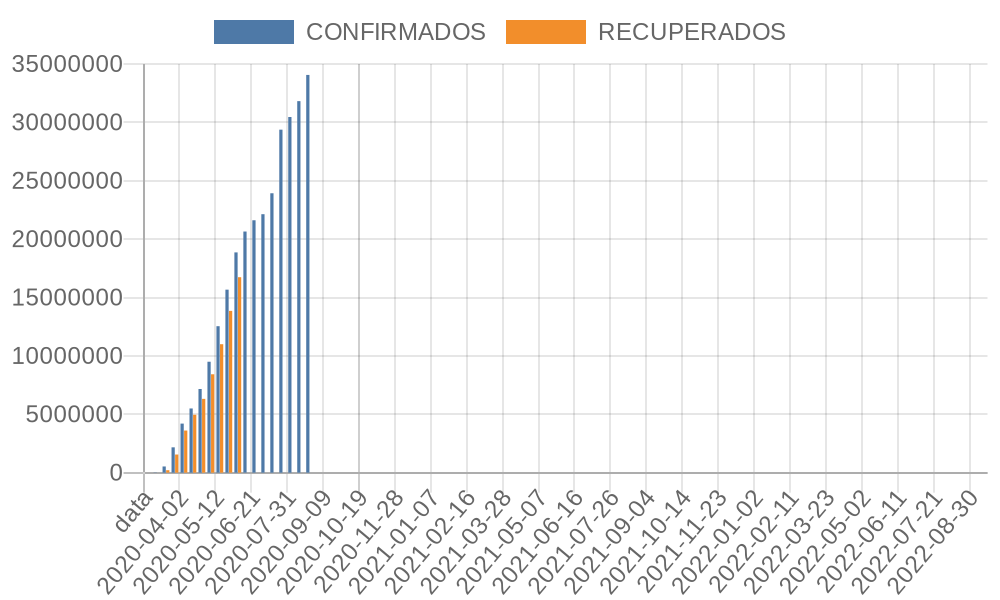

In [49]:
y_data_1 = []
for obs in final_data[1::50]:
    y_data_1.append(obs[CONFIRMADOS])

y_data_2 = []
for obs  in final_data[1::50]:
    y_data_2.append(obs[RECUPERADOS])

labels = ['CONFIRMADOS', 'RECUPERADOS']

x = []
for obs  in final_data[1::10]:
    x.append(obs[DATA])

chart = creat_chart(x, [y_data_1, y_data_2], labels, title='Gráficos confirmados vs recuperados')
chart_content = get_api_chart(chart)
save_image('meu primeiros grafico.png', chart_content)
display_image('meu primeiros grafico.png')

In [44]:
from urllib.parse import quote

In [45]:
def get_api_qrcode(link):
    text = quote(link) # parsing do link  para url
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content

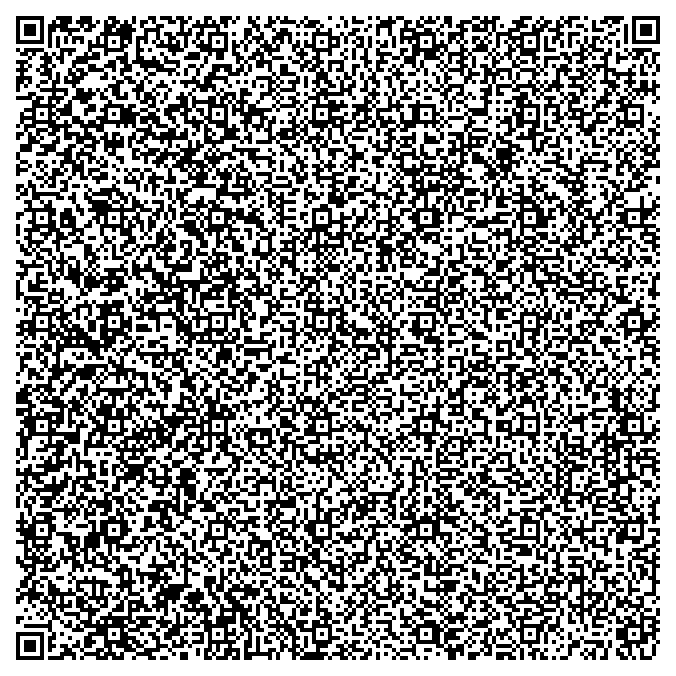

In [50]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')